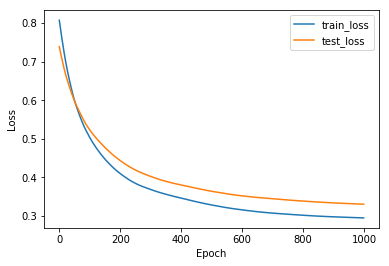

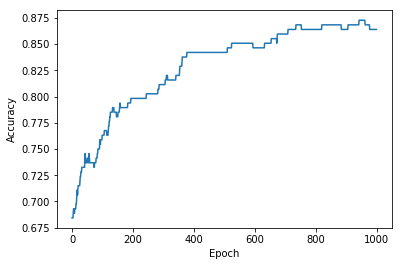

minmal train loss:  0.295144458228
minmal test loss:  0.330699250912
minmal accuracy of classification:  0.872807017544


In [2]:
# write your code here
from sklearn import datasets,model_selection
import numpy as np
from scipy.sparse import hstack, csr_matrix

def data_loader(file):
    inputs,labels = datasets.load_svmlight_file(file)
    #preprocess the data, change y=wx+b to y=wx', where x'is one more cloumn than x
    one = np.ones((inputs.shape[0],1))
    inputs = hstack( [inputs, csr_matrix(one)] ).toarray()  # change the type of inputs from matrix to ndarray
    labels = np.array(labels).reshape(inputs.shape[0],1)
    return inputs, labels

def train(X_train, y_train, theta, learning_rate, C=1):
    ## set the y_i where 1 - y_train * X_train.dot(theta) < 0 to 0 
    index =  (1 - y_train * X_train.dot(theta) < 0)
    y = y_train.copy()
    y[index] = 0
    
    #compute gradient and update parameter of model 
    epsilon_gradient = -np.dot(X_train.transpose(), y)  ###
    gradient = theta + C * epsilon_gradient
    theta -= learning_rate*gradient
    return theta

def loss_function(X, y, theta, C=1):
    #compute the loss of the model 
    epsilon_loss = 1 - y * X.dot(theta)
    epsilon_loss[epsilon_loss<0] = 0
    loss = 0.5 * np.dot(theta.transpose(), theta).sum() + C*epsilon_loss.sum()
    return loss/X.shape[0]

def accuracy_of_classification(X, y, theta, threshold=0):
    y_prediction = X.dot(theta)
    # calssification
    y_prediction[y_prediction<threshold] = -1
    y_prediction[y_prediction>=threshold] = 1
    
    #compute accuray of classifica
    classification = y*y_prediction
    classification[classification==-1] = 0
    accuracy = classification.sum()/classification.shape[0]
    return accuracy

def plot_loss(train_loss,test_loss, test_accuracy):
    import matplotlib.pyplot as plt
    figure1 = plt.figure(1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(train_loss, label="train_loss")
    plt.plot(test_loss, label="test_loss")
    plt.legend(loc='upper right')

    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(test_accuracy)
    plt.show()

def main(data_file, learning_rate, threshold=0, C=1, epoch=1000):
    X,y = data_loader(data_file)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33,random_state=42)
    theta = np.random.random((X.shape[1],1))
    train_loss = [] 
    test_loss = []
    test_accuracy =[]
    for episode in range(epoch):
        theta = train(X_train, y_train, theta, learning_rate, C)
        
        loss = loss_function(X_train, y_train, theta, C)
        train_loss.append(loss)

        loss = loss_function(X_test, y_test, theta, C)
        test_loss.append(loss)
        accuracy = accuracy_of_classification(X_test, y_test, theta, threshold)
        test_accuracy.append(accuracy)
    plot_loss(train_loss, test_loss, test_accuracy)
    print("minimal train loss: ", min(train_loss))
    print("minimal test loss: ", min(test_loss))
    print("minimal accuracy of classification: ", max(test_accuracy))

if __name__ =="__main__":
    learning_rate = 25e-6
    C = 0.9
    epoch = 1000
    threshold=0.
    main('australian.txt',learning_rate=learning_rate, threshold=threshold, C=C, epoch=epoch)